In [ ]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np

url = "https://www-users.cse.umn.edu/~sjguy/data/WhiteWine.txt"
df = pd.read_csv(url)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


<AxesSubplot:xlabel='quality', ylabel='Count'>

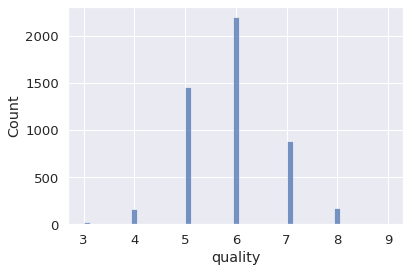

In [ ]:
import seaborn as sns
sns.set(font_scale=1.2)
sns.histplot(df["quality"])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='density', ylabel='Density'>

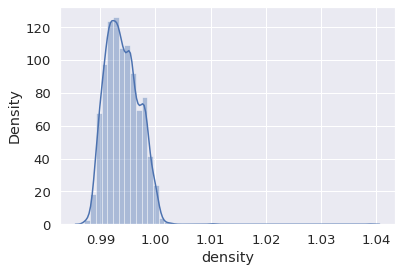

In [ ]:
sns.distplot(df["density"], kde = True)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

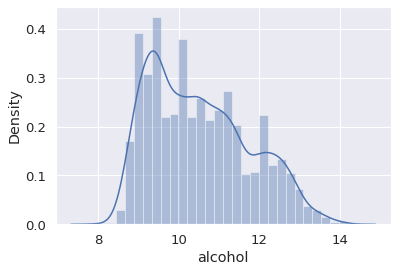

In [ ]:
sns.distplot(df["alcohol"], kde = True)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


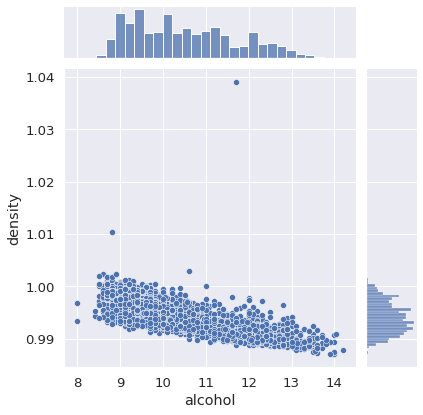

In [ ]:
sns.jointplot(df["alcohol"], df["density"])

<AxesSubplot:>

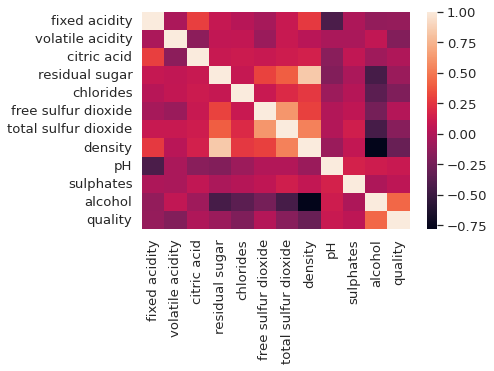

In [ ]:
sns.heatmap(df.corr())

In [ ]:
lr = 0.00001 #Larger lr goes faster, but what about too large an lr?

x_pt = torch.tensor(df['alcohol'].values)
y_pt = torch.tensor(df['quality'].values)
m = torch.Tensor([0.1]).float()
m.requires_grad = True
b = torch.Tensor([0.1]).float()
b.requires_grad = True

for epoch in range(10000):
  y_pred = m*x_pt+b
  loss_tenor = (y_pred - y_pt)**2
  loss = loss_tenor.mean()
  loss.backward()
  with torch.no_grad():
    m -= m.grad*lr
    b -= b.grad*lr
    m.grad.zero_()
    b.grad.zero_()
  if epoch%200==0:
    print("m=",m.item(),"b=",b.item(),"loss=",loss.item())


m= 0.10100037604570389 b= 0.10009453445672989 loss= 23.04404887572867
m= 0.2617281675338745 b= 0.11530832201242447 loss= 9.744692650351967
m= 0.3639305830001831 b= 0.12503038346767426 loss= 4.366837284048157
m= 0.42891645431518555 b= 0.1312602013349533 loss= 2.1922016383087333
m= 0.47023674845695496 b= 0.13526931405067444 loss= 1.312836262098397
m= 0.4965076446533203 b= 0.13786625862121582 loss= 0.9572460667645863
m= 0.5132087469100952 b= 0.1395653635263443 loss= 0.8134517977824844
m= 0.5238245129585266 b= 0.14069342613220215 loss= 0.7553002037532112
m= 0.5305708646774292 b= 0.14145825803279877 loss= 0.7317794254236271
m= 0.5348567366600037 b= 0.1419922113418579 loss= 0.7222626624654644
m= 0.5375771522521973 b= 0.1423792988061905 loss= 0.718410081755166
m= 0.5393025279045105 b= 0.1426730453968048 loss= 0.7168471007928434
m= 0.5403956770896912 b= 0.14290739595890045 loss= 0.7162097138765018
m= 0.5410861372947693 b= 0.14310398697853088 loss= 0.7159469582365655
m= 0.5415207147598267 b= 0.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

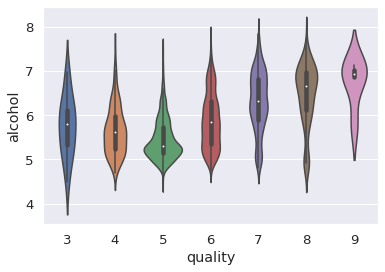

In [ ]:
m = 0.5418670773506165
b = 0.14793260395526886
y_pred = m*df['alcohol'] + b
sns.violinplot(df['quality'],y_pred )

In [ ]:
lr = 0.00001 #Larger lr goes faster, but what about too large an lr?

x_pt = torch.tensor(df['alcohol'].values)
x_pt1 = torch.tensor(df['citric acid'].values)
x_pt2 = torch.tensor(df['pH'].values)
y_pt = torch.tensor(df['quality'].values)

m = torch.Tensor([0.001]).float()
m.requires_grad = True
m1 = torch.Tensor([0.001]).float()
m1.requires_grad = True
m2 = torch.Tensor([0.001]).float()
m2.requires_grad = True
b = torch.Tensor([0.0001]).float()
b.requires_grad = True

for epoch in range(3600):
  y_pred = m*x_pt + m1*x_pt1 + m2*x_pt2 + b
  loss_tenor = (y_pred - y_pt)**2
  loss = loss_tenor.mean()
  loss.backward()
  with torch.no_grad():
    m -= m.grad*lr
    m1 -= m1.grad*lr
    m2 -= m2.grad*lr
    b -= b.grad*lr
    m.grad.zero_()
    b.grad.zero_()
  if epoch%200==0:
    print("m=",m.item(), "m1=",m1.item(), "m2=",m2.item(), "b=",b.item(),"loss=",loss.item())


m= 0.002242527436465025 m1= 0.0010391727555543184 m2= 0.0013741705333814025 b= 0.0002172754320781678 loss= 35.16705263910183
m= 0.0205637589097023 m1= 0.3356609046459198 m2= 3.1871554851531982 b= 0.0018228382105007768 loss= 22.130036714067153
m= -0.02344314008951187 m1= 0.09718594700098038 m2= 0.8512462377548218 b= -0.002544461051002145 loss= 12.091475192606437
m= 0.039120908826589584 m1= 0.2661283016204834 m2= 2.382061004638672 b= 0.003253498114645481 loss= 5.627960911869436
m= -0.02239714004099369 m1= 0.18628565967082977 m2= 1.4978110790252686 b= -0.002762874122709036 loss= 2.379754099388026
m= 0.03870368376374245 m1= 0.2391645461320877 m2= 1.8528090715408325 b= 0.0028875123243778944 loss= 1.0230189189201637
m= -0.00944031123071909 m1= 0.25739702582359314 m2= 1.846250295639038 b= -0.0018476874101907015 loss= 0.8204369618093984
m= 0.03194178640842438 m1= 0.25365570187568665 m2= 1.6018667221069336 b= 0.0019251187331974506 loss= 0.9058786176783555
m= 0.005487802904099226 m1= 0.314826369

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality'>

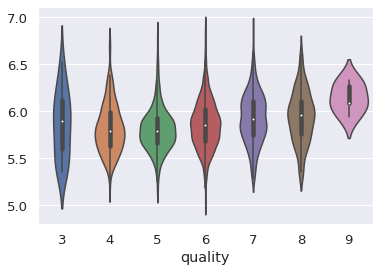

In [ ]:
m= 0.03254915401339531
m1= 0.5658944845199585
m2= 1.6713781356811523
b= 0.0004527994024101645 #very close to 0 so it is ommited
y_pred = m*df['alcohol'] + m1*df['citric acid'] + m2*df['pH']
sns.violinplot(df['quality'],y_pred )

In [ ]:
lr = 0.0001 #Larger lr goes faster, but what about too large an lr?

x_pt = torch.tensor(df['alcohol'].values)
x_pt1 = torch.tensor(df['citric acid'].values)
x_pt2 = torch.tensor(df['pH'].values)
y_pt = torch.tensor(df['quality'].values)

m = torch.Tensor([0.0001]).float()
m.requires_grad = True
m1 = torch.Tensor([0.0001]).float()
m1.requires_grad = True
m2 = torch.Tensor([0.0001]).float()
m2.requires_grad = True
b = torch.Tensor([0.0001]).float()
b.requires_grad = True

for epoch in range(4200):
  y_pred = m*x_pt + m1*x_pt1 * m2*x_pt2 + b
  loss_tenor = (y_pred - y_pt)**2
  loss = loss_tenor.mean()
  loss.backward()
  with torch.no_grad():
    m -= m.grad*lr
    m1 -= m1.grad*lr
    m2 -= m2.grad*lr
    b -= b.grad*lr
    m.grad.zero_()
    b.grad.zero_()
  if epoch%200==0:
    print("m=",m.item(), "m1=",m1.item(), "m2=",m2.item(), "b=",b.item(),"loss=",loss.item())

m= 0.012552855536341667 m1= 0.00010012493294198066 m2= 0.00010012493294198066 b= 0.0012753515038639307 loss= 35.320384210071204
m= 0.5452108979225159 m1= 0.0019171900348737836 m2= 0.0019171900348737836 b= 0.05262443423271179 loss= 0.725502846867932
m= 0.5505784153938293 m1= 0.005943014286458492 m2= 0.005943014286458492 b= 0.054494451731443405 loss= 0.7217246028011892
m= 0.5504981875419617 m1= 0.012679794803261757 m2= 0.012679794803261757 b= 0.05585257336497307 loss= 0.7216184923980542
m= 0.5503364205360413 m1= 0.02501760981976986 m2= 0.02501760981976986 b= 0.05720215663313866 loss= 0.7214769543163787
m= 0.5500789284706116 m1= 0.048343438655138016 m2= 0.048343438655138016 b= 0.05854130908846855 loss= 0.7212045926486808
m= 0.5494750142097473 m1= 0.09251179546117783 m2= 0.09251179546117783 b= 0.059844858944416046 loss= 0.7204684314644803
m= 0.5476662516593933 m1= 0.1739659160375595 m2= 0.1739659160375595 b= 0.06102632358670235 loss= 0.718257808601195
m= 0.5422580242156982 m1= 0.3099438250

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality'>

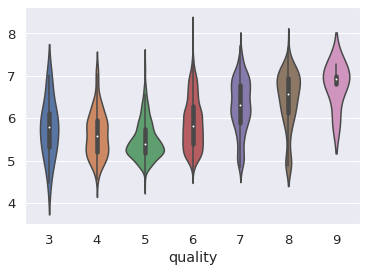

In [ ]:
m = 0.516653835773468
m1 = 0.5691884756088257
m2 = 0.5691884756088257
b= 0.0732298493385315
y_pred = m*df['alcohol'] + m1*df['citric acid'] * m2*df['pH'] + b
sns.violinplot(df['quality'],y_pred )

In [ ]:
def is_close(y, pred, t):
  result = y - pred
  return (abs(result) < t)

def accuracy(y_val, y_pred, t_val):
  count = 0
  length = y_val.size
  for i in range(length):
    if is_close(y_val[i], y_pred[i], t_val):
      count += 1
  return count/length

In [ ]:
#MODEL 1 TEST
t = 1
m = 0.5418670773506165
b = 0.14793260395526886
y_pred = m*df['alcohol'] + b
print(accuracy(df['quality'], y_pred, t))

t = 0.5
m = 0.5418670773506165
b = 0.14793260395526886
y_pred = m*df['alcohol'] + b
print(accuracy(df['quality'], y_pred, t))

t = 0.25
m = 0.5418670773506165
b = 0.14793260395526886
y_pred = m*df['alcohol'] + b
accuracy(df['quality'], y_pred, t)

0.8007349938750511
0.4812168231931401


0.28868926092282565

In [ ]:
#MODEL 2 TEST
t = 1
m= 0.03254915401339531
m1= 0.5658944845199585
m2= 1.6713781356811523
y_pred = m*df['alcohol'] + m1*df['citric acid'] + m2*df['pH']
print(accuracy(df['quality'], y_pred, t))

t = 0.5
m= 0.03254915401339531
m1= 0.5658944845199585
m2= 1.6713781356811523
y_pred = m*df['alcohol'] + m1*df['citric acid'] + m2*df['pH']
print(accuracy(df['quality'], y_pred, t))

t = 0.25
m= 0.03254915401339531
m1= 0.5658944845199585
m2= 1.6713781356811523
y_pred = m*df['alcohol'] + m1*df['citric acid'] + m2*df['pH']
print(accuracy(df['quality'], y_pred, t))

0.7739893834218048
0.4385463454471213
0.2660269497754185


In [ ]:
#MODEL 3 TEST
t = 1
m = 0.516653835773468
m1 = 0.5691884756088257
m2 = 0.5691884756088257
b= 0.0732298493385315
y_pred = m*df['alcohol'] + m1*df['citric acid'] * m2*df['pH'] + b
print(accuracy(df['quality'], y_pred, t))

t = 0.5
m = 0.516653835773468
m1 = 0.5691884756088257
m2 = 0.5691884756088257
b= 0.0732298493385315
y_pred = m*df['alcohol'] + m1*df['citric acid'] * m2*df['pH'] + b
print(accuracy(df['quality'], y_pred, t))

t = 0.25
m = 0.516653835773468
m1 = 0.5691884756088257
m2 = 0.5691884756088257
b= 0.0732298493385315
y_pred = m*df['alcohol'] + m1*df['citric acid'] * m2*df['pH'] + b
print(accuracy(df['quality'], y_pred, t))


0.8074724377296856
0.4812168231931401
0.26929358922008984


In [ ]:
def train_test_split(X,y,test_size):
  numRows = y.size                     #number or rows in the entire dataset
  splitPoint = int((1-test_size)*numRows)  #the row index test_size% of the way through
  p = np.random.permutation(numRows)   #array for shuffling data
  X = X[p]
  y = y[p]

  #Training data array
  X_train = X[:splitPoint]  # training features
  y_train = y[:splitPoint]  # training labels

  #Testing data array
  X_test = X[splitPoint:]  # testing features
  y_test = y[splitPoint:] # testing labels

  return X_train, X_test, y_train, y_test


In [ ]:
X = df['alcohol'].to_numpy()
y = df['quality'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)

In [ ]:
lr = 0.00001 #Larger lr goes faster, but what about too large an lr?

x_pt = torch.tensor(X_train)
y_pt = torch.tensor(y_train)
m = torch.Tensor([0.1]).float()
m.requires_grad = True
b = torch.Tensor([0.1]).float()
b.requires_grad = True

for epoch in range(10000):
  y_pred = m*x_pt+b
  loss_tenor = (y_pred - y_pt)**2
  loss = loss_tenor.mean()
  loss.backward()
  with torch.no_grad():
    m -= m.grad*lr
    b -= b.grad*lr
    m.grad.zero_()
    b.grad.zero_()
  if epoch%200==0:
    print("m=",m.item(),"b=",b.item(),"loss=",loss.item())

m= 0.10100588202476501 b= 0.10009491443634033 loss= 23.215899510322746
m= 0.2625182271003723 b= 0.11536131799221039 loss= 9.785271266009271
m= 0.3650829493999481 b= 0.1251041740179062 loss= 4.368779793058897
m= 0.4302123188972473 b= 0.1313392072916031 loss= 2.184349933593564
m= 0.47156843543052673 b= 0.13534671068191528 loss= 1.3033795282304546
m= 0.49782735109329224 b= 0.13793954253196716 loss= 0.9480840506460692
m= 0.5144988894462585 b= 0.1396338790655136 loss= 0.80478951960761
m= 0.525081217288971 b= 0.1407577395439148 loss= 0.7469971526638677
m= 0.5317974090576172 b= 0.14151927828788757 loss= 0.7236832761109219
m= 0.5360579490661621 b= 0.14205068349838257 loss= 0.7142761350696059
m= 0.5387591123580933 b= 0.14243601262569427 loss= 0.7104769745334854
m= 0.5404700040817261 b= 0.14272858202457428 loss= 0.7089395838566704
m= 0.5415522456169128 b= 0.14296220242977142 loss= 0.7083142905487844
m= 0.5422350168228149 b= 0.14315839111804962 loss= 0.7080569404658559
m= 0.5426640510559082 b= 0.

In [ ]:
#MODEL 1 TEST
t = 1
m = 0.5420423150062561
b = 0.1481543779373169
y_pred = m*X_test + b
print(accuracy(y_test, y_pred, t))

t = 0.5
m = 0.5420423150062561
b = 0.1481543779373169
y_pred = m*X_test + b
print(accuracy(y_test, y_pred, t))

t = 0.25
m = 0.5420423150062561
b = 0.1481543779373169
y_pred = m*X_test + b
accuracy(y_test, y_pred, t)

0.808286951144094
0.49783549783549785


0.29684601113172543

In [ ]:
# #MODEL 2 TEST

X = df['alcohol'].to_numpy()
y = df['quality'].to_numpy()
W = df['citric acid'].to_numpy()
Z = df['pH'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
W_train, W_test, y_train, y_test = train_test_split(W,y,0.33)
Z_train, Z_test, y_train, y_test = train_test_split(Z,y,0.33)

t = 1
m= 0.03254915401339531
m1= 0.5658944845199585
m2= 1.6713781356811523
y_pred = m*X_test + m1*W_test + m2*Z_test
print(accuracy(y_test, y_pred, t))

t = 0.5
m= 0.03254915401339531
m1= 0.5658944845199585
m2= 1.6713781356811523
y_pred = m*X_test + m1*W_test + m2*Z_test
print(accuracy(y_test, y_pred, t))

t = 0.25
m= 0.03254915401339531
m1= 0.5658944845199585
m2= 1.6713781356811523
y_pred = m*X_test + m1*W_test + m2*Z_test
print(accuracy(y_test, y_pred, t))


0.7421150278293135
0.4489795918367347
0.272108843537415


In [ ]:
#MODEL 3 TEST

X = df['alcohol'].to_numpy()
y = df['quality'].to_numpy()
W = df['citric acid'].to_numpy()
Z = df['pH'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
W_train, W_test, y_train, y_test = train_test_split(W,y,0.33)
Z_train, Z_test, y_train, y_test = train_test_split(Z,y,0.33)

t = 1
m= 0.03254915401339531
m1= 0.5658944845199585
m2= 1.6713781356811523
y_pred = m*X_test + m1*W_test + m2*Z_test + b
print(accuracy(y_test, y_pred, t))

t = 0.5
m= 0.03254915401339531
m1= 0.5658944845199585
m2= 1.6713781356811523
y_pred = m*X_test + m1*W_test + m2*Z_test + b
print(accuracy(y_test, y_pred, t))

t = 0.25
m= 0.03254915401339531
m1= 0.5658944845199585
m2= 1.6713781356811523
y_pred = m*X_test + m1*W_test + m2*Z_test + b
print(accuracy(y_test, y_pred, t))

0.7167594310451453
0.45021645021645024
0.30735930735930733
